In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
beans = pd.read_csv("/content/drive/MyDrive/_lat/Dry_Bean_Dataset.csv")
beans.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# PREPOCESSING

In [ ]:
beans.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
beans.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
beans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
beans['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

beans['Class_encoded'] = label_encoder.fit_transform(beans['Class'])

beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,Class_encoded
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,5


In [ ]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
print(class_mapping)

Class Mapping:
{'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}


In [ ]:
beans = beans.drop('Class',axis='columns')


In [ ]:
beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class_encoded
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


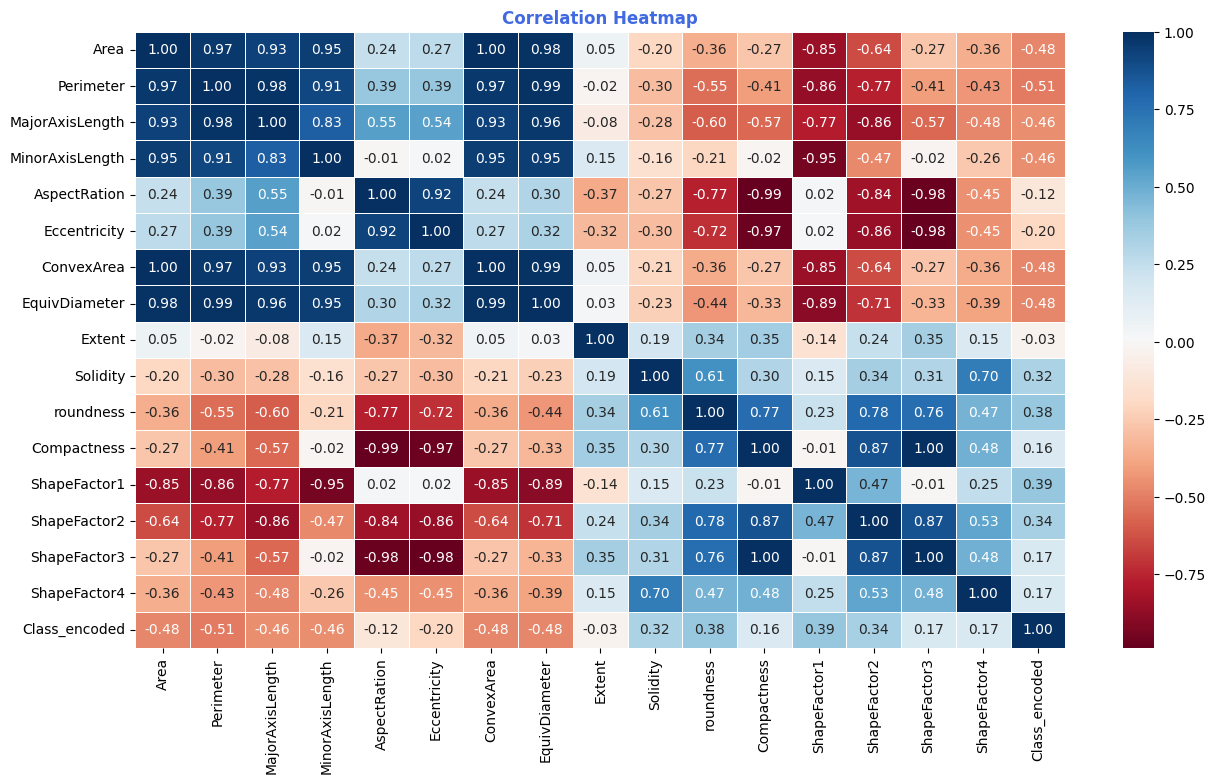

In [ ]:
corr_matrix = beans.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap',color='royalblue',weight='bold')
plt.show()

In [ ]:
beans.shape

In [ ]:
beans.duplicated().sum()

68

In [ ]:
beans.drop_duplicates(inplace=True)


In [ ]:
beans.duplicated().sum()

0

## SPLIT DATA

In [ ]:
X = beans.drop('Class_encoded',axis='columns')
y=beans['Class_encoded']

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


# Iterasi melalui random_states dan evaluasi akurasi

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)


In [ ]:
print("Total X Training : ", X_train.shape)
print("Total X Testing : ", X_test.shape)
print("Total Y Testing : ", y_test.shape)

Total X Training :  (10834, 16)
Total X Testing :  (2709, 16)
Total Y Testing :  (2709,)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [ ]:
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# MODELING

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# decision tree
paper 3 88%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

total_accuracy = 0.0

for i in range(30):
    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1}".format(i+1, accuracy))

    # Add accuracy to total
    total_accuracy += accuracy

# Calculate average accuracy
avg_accuracy = total_accuracy / 30
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma Decision Tree dari 30 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))


Akurasi pada percobaan ke-1: 0.9051310446659284
Akurasi pada percobaan ke-2: 0.9058693244739756
Akurasi pada percobaan ke-3: 0.9029162052417866
Akurasi pada percobaan ke-4: 0.9051310446659284
Akurasi pada percobaan ke-5: 0.9003322259136213
Akurasi pada percobaan ke-6: 0.9003322259136213
Akurasi pada percobaan ke-7: 0.9010705057216685
Akurasi pada percobaan ke-8: 0.9010705057216685
Akurasi pada percobaan ke-9: 0.8981173864894795
Akurasi pada percobaan ke-10: 0.9010705057216685
Akurasi pada percobaan ke-11: 0.9029162052417866
Akurasi pada percobaan ke-12: 0.9029162052417866
Akurasi pada percobaan ke-13: 0.899593946105574
Akurasi pada percobaan ke-14: 0.9018087855297158
Akurasi pada percobaan ke-15: 0.9021779254337394
Akurasi pada percobaan ke-16: 0.9029162052417866
Akurasi pada percobaan ke-17: 0.9018087855297158
Akurasi pada percobaan ke-18: 0.902547065337763
Akurasi pada percobaan ke-19: 0.9032853451458103
Akurasi pada percobaan ke-20: 0.9003322259136213
Akurasi pada percobaan ke-21: 0

# RANDOM FOREST
paper 96%


paper 3 (93%)

93,69

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

total_accuracy = 0.0

for i in range(30):
    # Create Decision Tree classifer object
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1}".format(i+1, accuracy))

    # Add accuracy to total
    total_accuracy += accuracy

# Calculate average accuracy
avg_accuracy = total_accuracy / 30
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma Random Forest Classifier dari 30 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))


Akurasi pada percobaan ke-1: 0.9361387966039129
Akurasi pada percobaan ke-2: 0.9368770764119602
Akurasi pada percobaan ke-3: 0.9390919158361019
Akurasi pada percobaan ke-4: 0.9383536360280547
Akurasi pada percobaan ke-5: 0.9354005167958657
Akurasi pada percobaan ke-6: 0.9365079365079365
Akurasi pada percobaan ke-7: 0.9365079365079365
Akurasi pada percobaan ke-8: 0.9372462163159837
Akurasi pada percobaan ke-9: 0.9361387966039129
Akurasi pada percobaan ke-10: 0.94093761535622
Akurasi pada percobaan ke-11: 0.9413067552602437
Akurasi pada percobaan ke-12: 0.937984496124031
Akurasi pada percobaan ke-13: 0.9376153562200074
Akurasi pada percobaan ke-14: 0.9372462163159837
Akurasi pada percobaan ke-15: 0.9357696566998892
Akurasi pada percobaan ke-16: 0.935031376891842
Akurasi pada percobaan ke-17: 0.9376153562200074
Akurasi pada percobaan ke-18: 0.937984496124031
Akurasi pada percobaan ke-19: 0.9365079365079365
Akurasi pada percobaan ke-20: 0.935031376891842
Akurasi pada percobaan ke-21: 0.935

# GRADIENT BOOST

di paper 93%

93,88

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

total_accuracy = 0.0

for i in range(5):
    # Create Gradient Boosting classifer object
    clf = GradientBoostingClassifier()
    clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1}".format(i+1, accuracy))

    # Add accuracy to total
    total_accuracy += accuracy
# Calculate average accuracy
avg_accuracy = total_accuracy / 5
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma Gradient Boosting Classifier dari 5 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))


Akurasi pada percobaan ke-1: 0.9235880398671097
Akurasi pada percobaan ke-2: 0.9235880398671097
Akurasi pada percobaan ke-3: 0.9239571797711332
Akurasi pada percobaan ke-4: 0.9235880398671097
Akurasi pada percobaan ke-5: 0.9235880398671097
Rata-rata akurasi Algoritma Gradient Boosting Classifier dari 5 percobaan adalah: 92.37%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize total accuracy
total_accuracy = 0.0

for i in range(5):
    # Create Gradient Boosting classifier object
    clf = GradientBoostingClassifier()
    clf.fit(X_train_scaled, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test_scaled)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1:.2f}%".format(i + 1, accuracy * 100))

    # Add accuracy to total
    total_accuracy += accuracy

# Calculate average accuracy
avg_accuracy = total_accuracy / 5
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma Gradient Boosting Classifier dari 5 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))

# Cross-validation for more accurate measure
cv_scores = cross_val_score(GradientBoostingClassifier(), X_train_scaled, y_train, cv=5, scoring='accuracy')
avg_cv_accuracy = np.mean(cv_scores)
avg_cv_accuracy_percentage = avg_cv_accuracy * 100

print("Rata-rata akurasi dengan cross-validation: {:.2f}%".format(avg_cv_accuracy_percentage))


Akurasi pada percobaan ke-1: 92.25%
Akurasi pada percobaan ke-2: 92.25%
Akurasi pada percobaan ke-3: 92.25%
Akurasi pada percobaan ke-4: 92.21%
Akurasi pada percobaan ke-5: 92.25%
Rata-rata akurasi Algoritma Gradient Boosting Classifier dari 5 percobaan adalah: 92.24%
Rata-rata akurasi dengan cross-validation: 92.56%


# CatBoost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

total_accuracy = 0.0

for i in range(30):
    # Create CatBoost classifier object with different random seed
    random_seed = np.random.randint(1000)  # Generate random seed
    clf = CatBoostClassifier(verbose=False, random_seed=random_seed)  # Tidak mencetak info training
    clf.fit(X_train, y_train)

    # Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this iteration
    accuracy = accuracy_score(y_test, y_pred)

    # Model Accuracy, how often is the classifier correct?
    print("Akurasi pada percobaan ke-{0}: {1}".format(i+1, accuracy))

    # Add accuracy to total
    total_accuracy += accuracy

# Calculate average accuracy
avg_accuracy = total_accuracy / 30
avg_accuracy_percentage = avg_accuracy * 100  # Convert to percentage

print("Rata-rata akurasi Algoritma CatBoost dari 30 percobaan adalah: {:.2f}%".format(avg_accuracy_percentage))


Akurasi pada percobaan ke-1: 0.9435215946843853
Akurasi pada percobaan ke-2: 0.9390919158361019
Akurasi pada percobaan ke-3: 0.9427833148763382
Akurasi pada percobaan ke-4: 0.9416758951642673
Akurasi pada percobaan ke-5: 0.9416758951642673
Akurasi pada percobaan ke-6: 0.9435215946843853
Akurasi pada percobaan ke-7: 0.9394610557401255
Akurasi pada percobaan ke-8: 0.9405684754521964
Akurasi pada percobaan ke-9: 0.9405684754521964
Akurasi pada percobaan ke-10: 0.9427833148763382
Akurasi pada percobaan ke-11: 0.9390919158361019
Akurasi pada percobaan ke-12: 0.9401993355481728
Akurasi pada percobaan ke-13: 0.9394610557401255
Akurasi pada percobaan ke-14: 0.94093761535622
Akurasi pada percobaan ke-15: 0.9401993355481728
Akurasi pada percobaan ke-16: 0.9413067552602437
Akurasi pada percobaan ke-17: 0.9413067552602437
Akurasi pada percobaan ke-18: 0.9413067552602437
Akurasi pada percobaan ke-19: 0.9442598744924326
Akurasi pada percobaan ke-20: 0.94093761535622
Akurasi pada percobaan ke-21: 0.9

### ***HYPERPARAMETER TUNING GRADIENT BOOST ***

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np
import pandas as pd

# Fine-tuned parameter grid for grid search
param_grid = {
    'n_estimators': [50, 60, 70, 100, 120, 150],
    'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_depth': [2, 4, 6, 8, 10]
}

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=25)

# List to store accuracy for each fold
accuracies = []

# Convert X_train and y_train to numpy arrays if they are not already
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

# KFold Cross Validation with GridSearchCV for each fold
fold = 1
for train_index, val_index in kf.split(X_train_np):
    X_train_kf, X_val_kf = X_train_np[train_index], X_train_np[val_index]
    y_train_kf, y_val_kf = y_train_np[train_index], y_train_np[val_index]

    # Create GradientBoostingClassifier object
    gbt = GradientBoostingClassifier()

    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=gbt, param_grid=param_grid, cv=3, scoring='accuracy')

    # Perform grid search on the current fold's training data
    grid_search.fit(X_train_kf, y_train_kf)

    # Get the best parameters for the current fold
    best_params = grid_search.best_params_
    print(f"Fold {fold} - Parameter terbaik dari GridSearchCV: {best_params}")

    # Create GradientBoostingClassifier with best parameters
    GBT_clf = GradientBoostingClassifier(**best_params)

    # Train the classifier on the current fold's training data
    GBT_clf.fit(X_train_kf, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = GBT_clf.predict(X_val_kf)

    # Calculate accuracy
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    accuracies.append(accuracy_kf * 100)

    print(f"Fold {fold} - Akurasi = {accuracy_kf * 100:.2f}%")
    fold += 1

# Calculate mean accuracy over all folds
mean_accuracy = np.mean(accuracies)
print("Rata-rata akurasi setelah KFold cross-validation: {:.2f}%".format(mean_accuracy))

# Final evaluation on the test set using the best hyperparameters found
# Re-fit the model using the entire training data with the best hyperparameters found in the last fold (for simplicity)
GBT_clf.fit(X_train_np, y_train_np)
y_pred_test = GBT_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test) * 100
print("Akurasi pada test set: {:.2f}%".format(test_accuracy))

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fold 1 - Parameter terbaik dari GridSearchCV: {'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 100}
Fold 1 - Akurasi = 92.29%


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Assuming X and y are defined and preprocessed earlier in the code

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Parameter grid for grid search
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.2],
    'max_depth': [5]
}

# Create Gradient Boosting classifier object
clf = GradientBoostingClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Parameter terbaik dari GridSearchCV:", best_params)

# Create GradientBoostingClassifier with best parameters
best_clf = GradientBoostingClassifier(**best_params)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store accuracy for each fold
accuracies = []

# Convert X_train and y_train to numpy arrays if they are not already
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

# KFold Cross Validation
fold = 1
for train_index, val_index in kf.split(X_train_np):
    X_train_kf, X_val_kf = X_train_np[train_index], X_train_np[val_index]
    y_train_kf, y_val_kf = y_train_np[train_index], y_train_np[val_index]

    # Train the classifier
    best_clf.fit(X_train_kf, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = best_clf.predict(X_val_kf)

    # Calculate accuracy
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    accuracies.append(accuracy_kf)

    print(f"Fold {fold}: Akurasi = {accuracy_kf:.4f}")
    fold += 1

# Calculate mean accuracy over all folds
mean_accuracy = np.mean(accuracies)
print("Rata-rata akurasi setelah KFold cross-validation: {:.4f}".format(mean_accuracy))

# Final evaluation on the test set
best_clf.fit(X_train_scaled, y_train)
y_pred_test = best_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Akurasi pada test set: {:.4f}".format(test_accuracy))


Parameter terbaik dari GridSearchCV: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Fold 1: Akurasi = 0.9192
Fold 2: Akurasi = 0.9345
Fold 3: Akurasi = 0.9206
Fold 4: Akurasi = 0.9160
Fold 5: Akurasi = 0.9155
Rata-rata akurasi setelah KFold cross-validation: 0.9212
Akurasi pada test set: 0.9269


### ***HYPERPARAMETER TUNING CATBOOST ***

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
import numpy as np
import pandas as pd

# Assuming X and y are defined and preprocessed earlier in the code

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'depth': [3, 5, 7, 9]
}

# Create CatBoostClassifier object
clf = CatBoostClassifier(verbose=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Parameter terbaik dari GridSearchCV:", best_params)

# Create CatBoostClassifier with best parameters
best_clf = CatBoostClassifier(**best_params, verbose=0)

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# List to store accuracy for each fold
accuracies = []

# Convert X_train and y_train to numpy arrays if they are not already
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

# KFold Cross Validation
fold = 1
for train_index, val_index in kf.split(X_train_np):
    X_train_kf, X_val_kf = X_train_np[train_index], X_train_np[val_index]
    y_train_kf, y_val_kf = y_train_np[train_index], y_train_np[val_index]

    # Train the classifier
    best_clf.fit(X_train_kf, y_train_kf)

    # Predict the response for validation set
    y_pred_kf = best_clf.predict(X_val_kf)

    # Calculate accuracy
    accuracy_kf = accuracy_score(y_val_kf, y_pred_kf)
    accuracies.append(accuracy_kf)

    print(f"Fold {fold}: Akurasi = {accuracy_kf:.4f}")
    fold += 1

# Calculate mean accuracy over all folds
mean_accuracy = np.mean(accuracies)
print("Rata-rata akurasi setelah KFold cross-validation: {:.4f}".format(mean_accuracy))

# Final evaluation on the test set
best_clf.fit(X_train, y_train)
y_pred_test = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Akurasi pada test set: {:.4f}".format(test_accuracy))


Parameter terbaik dari GridSearchCV: {'depth': 9, 'learning_rate': 0.05, 'n_estimators': 200}
Fold 1: Akurasi = 0.9299
Fold 2: Akurasi = 0.9377
Fold 3: Akurasi = 0.9239
Fold 4: Akurasi = 0.9271
Fold 5: Akurasi = 0.9243
Rata-rata akurasi setelah KFold cross-validation: 0.9286
Akurasi pada test set: 0.9295
